In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plt.style.use('seaborn-v0_8')

In [5]:
# 设置随机数生成器的种子，以便每次运行代码时都能得到相同的结果
np.random.seed(0)

# 生成一个50行2列的数组，其中的元素是从[0, 1)区间均匀分布的随机浮点数
X = np.random.rand(50, 2)

# 创建一个KMeans实例，指定要创建的簇的数量为3
# n_clusters 参数定义了算法应该尝试形成的簇的数量
kmeans = KMeans(n_clusters=3, random_state=0)

# 对数据集X进行拟合（即执行聚类）
# random_state 参数用于指定随机数生成器的种子，它保证了每次运行时初始化簇中心的方式相同
kmeans.fit(X)

# 获得每个样本所属的簇标签
# labels_ 是KMeans对象的一个属性，它保存了每个样本被分配到的簇索引
labels = kmeans.labels_

# 获取每个簇的中心点坐标
# cluster_centers_ 是KMeans对象的一个属性，它保存了每个簇的质心坐标
centers = kmeans.cluster_centers_

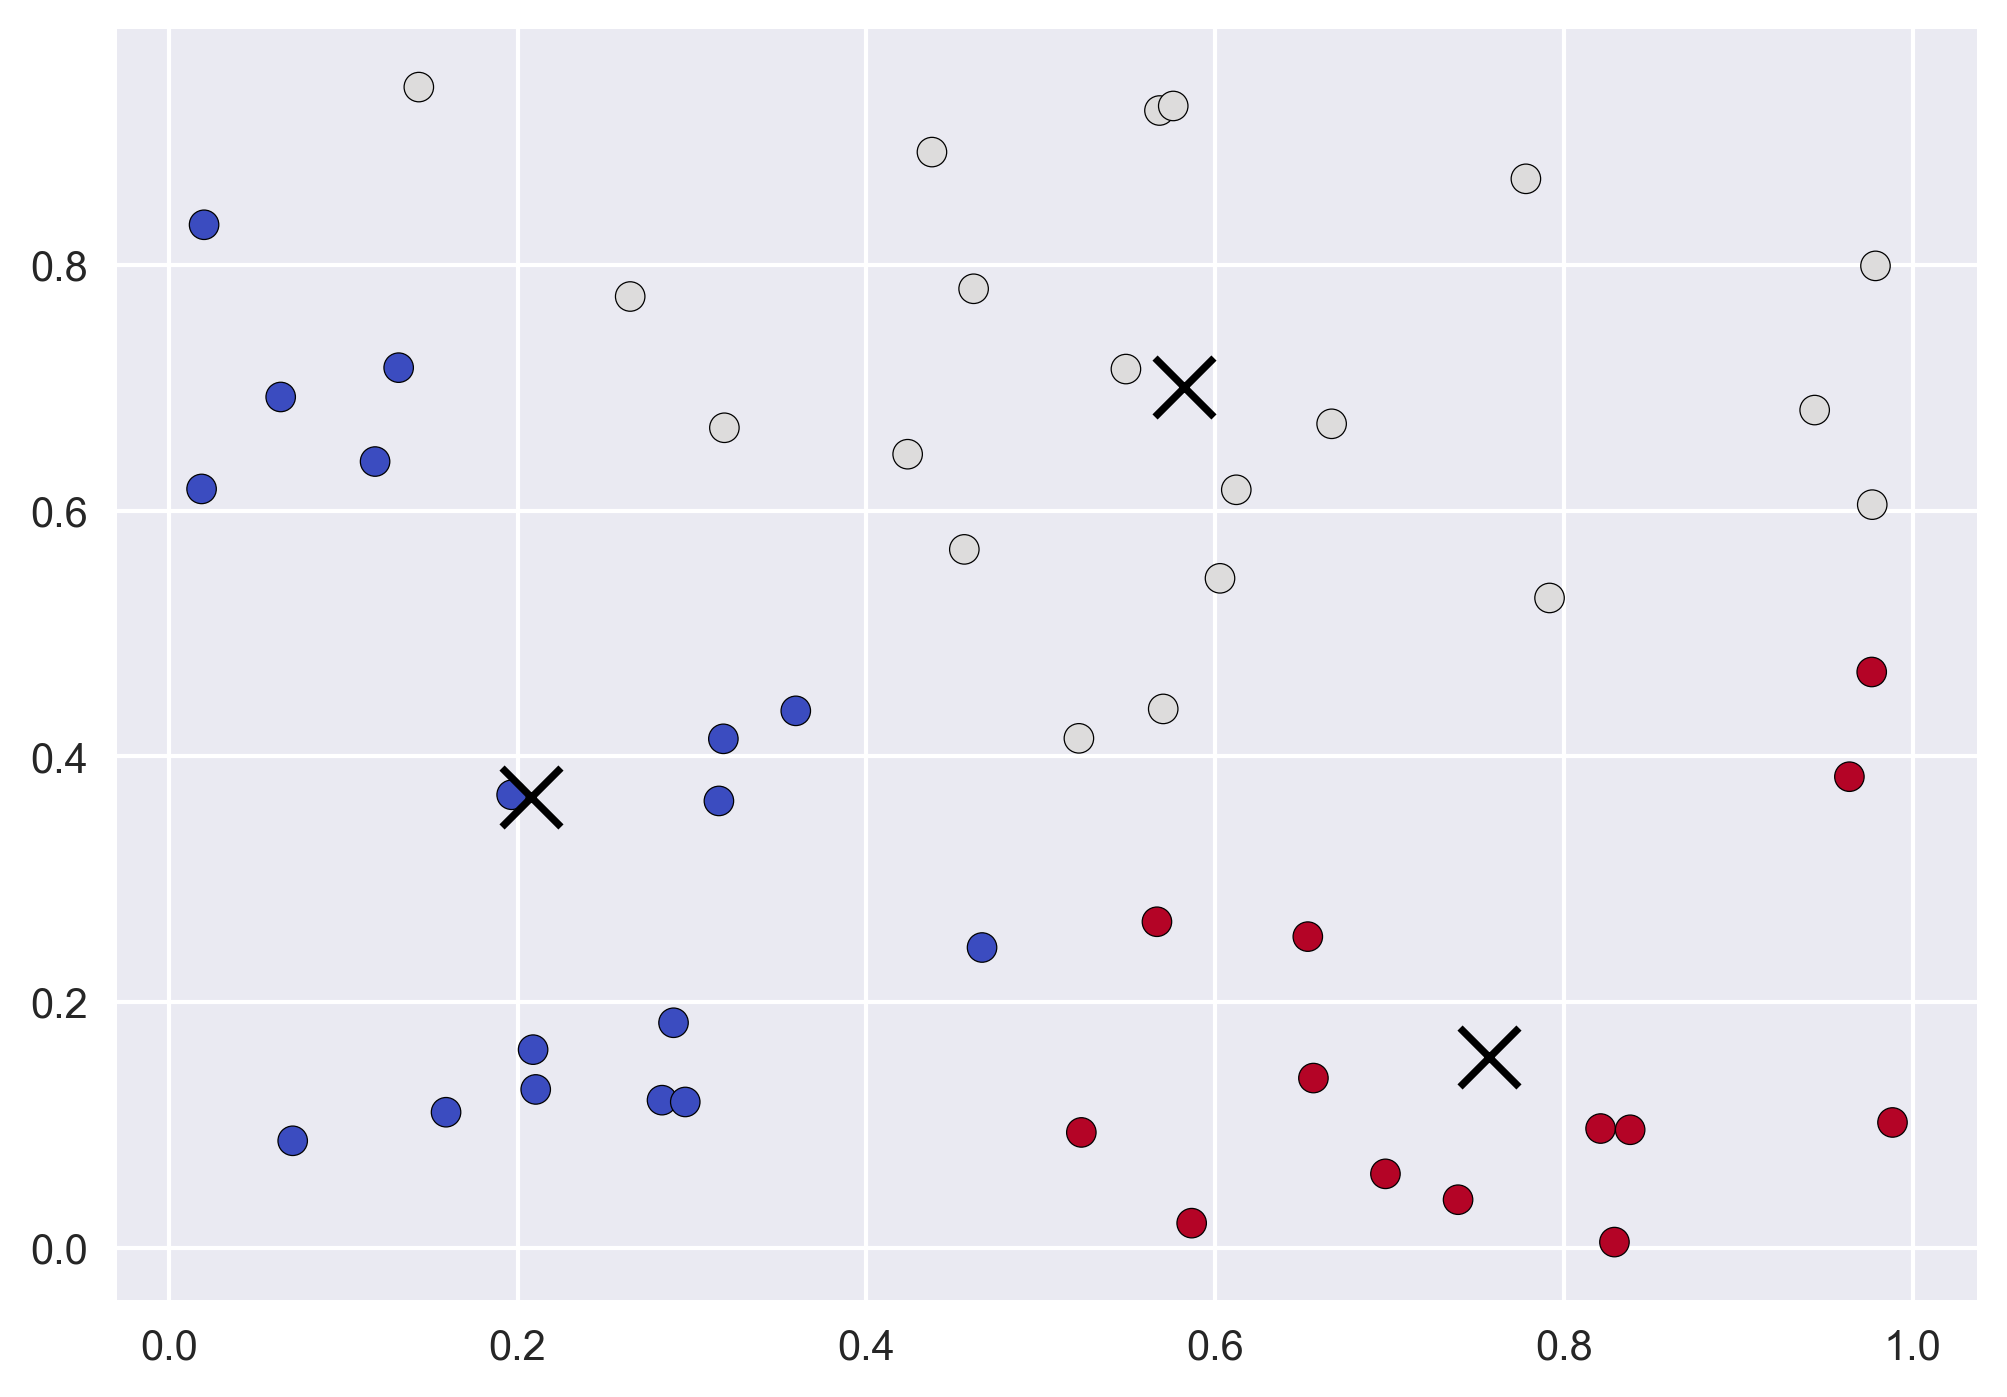

In [3]:
# 导入matplotlib库中的pyplot模块，用于绘制图形
import matplotlib.pyplot as plt

# 创建一个新的图形和轴对象，dpi参数设置图形分辨率为300，使得图形更加清晰
fig, ax = plt.subplots(dpi=300)

# 使用scatter函数绘制散点图
# X[:,0] 和 X[:,1] 分别代表数据集中所有点的第一个和第二个特征（即维度）
# c=labels 表示根据labels数组中的值来给每个点着色，这样不同簇的点会有不同的颜色
# s=50 定义了每个散点的大小
# edgecolor='k' 设置了散点边缘的颜色为黑色
# cmap='coolwarm' 指定了颜色映射，这里选择的是'coolwarm'色彩方案
scatter = ax.scatter(X[:,0], X[:,1], c=labels, s=50, edgecolor='k', cmap='coolwarm')

# 遍历每个簇的中心点
# i 和 j 分别对应中心点的两个坐标
for i, j in centers:
    # 绘制每个簇的中心点，s=200 设置了较大的点大小，marker='x' 设置了标记符号为'x'
    # color='black' 将中心点设置为黑色
    ax.scatter(i, j, s=200, marker='x', color='black')

# 显示绘制的图形
plt.show()

In [4]:
sse = []  # 初始化一个空列表来存储每一次迭代的SSE值

# 循环迭代从1个聚类中心到10个聚类中心
for k in range(1, 11):
    # 使用KMeans算法，指定k个聚类中心，并设置随机种子为0以保证结果可复现
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    
    # 计算并存储当前模型的SSE值
    sse.append(kmeans.inertia_)

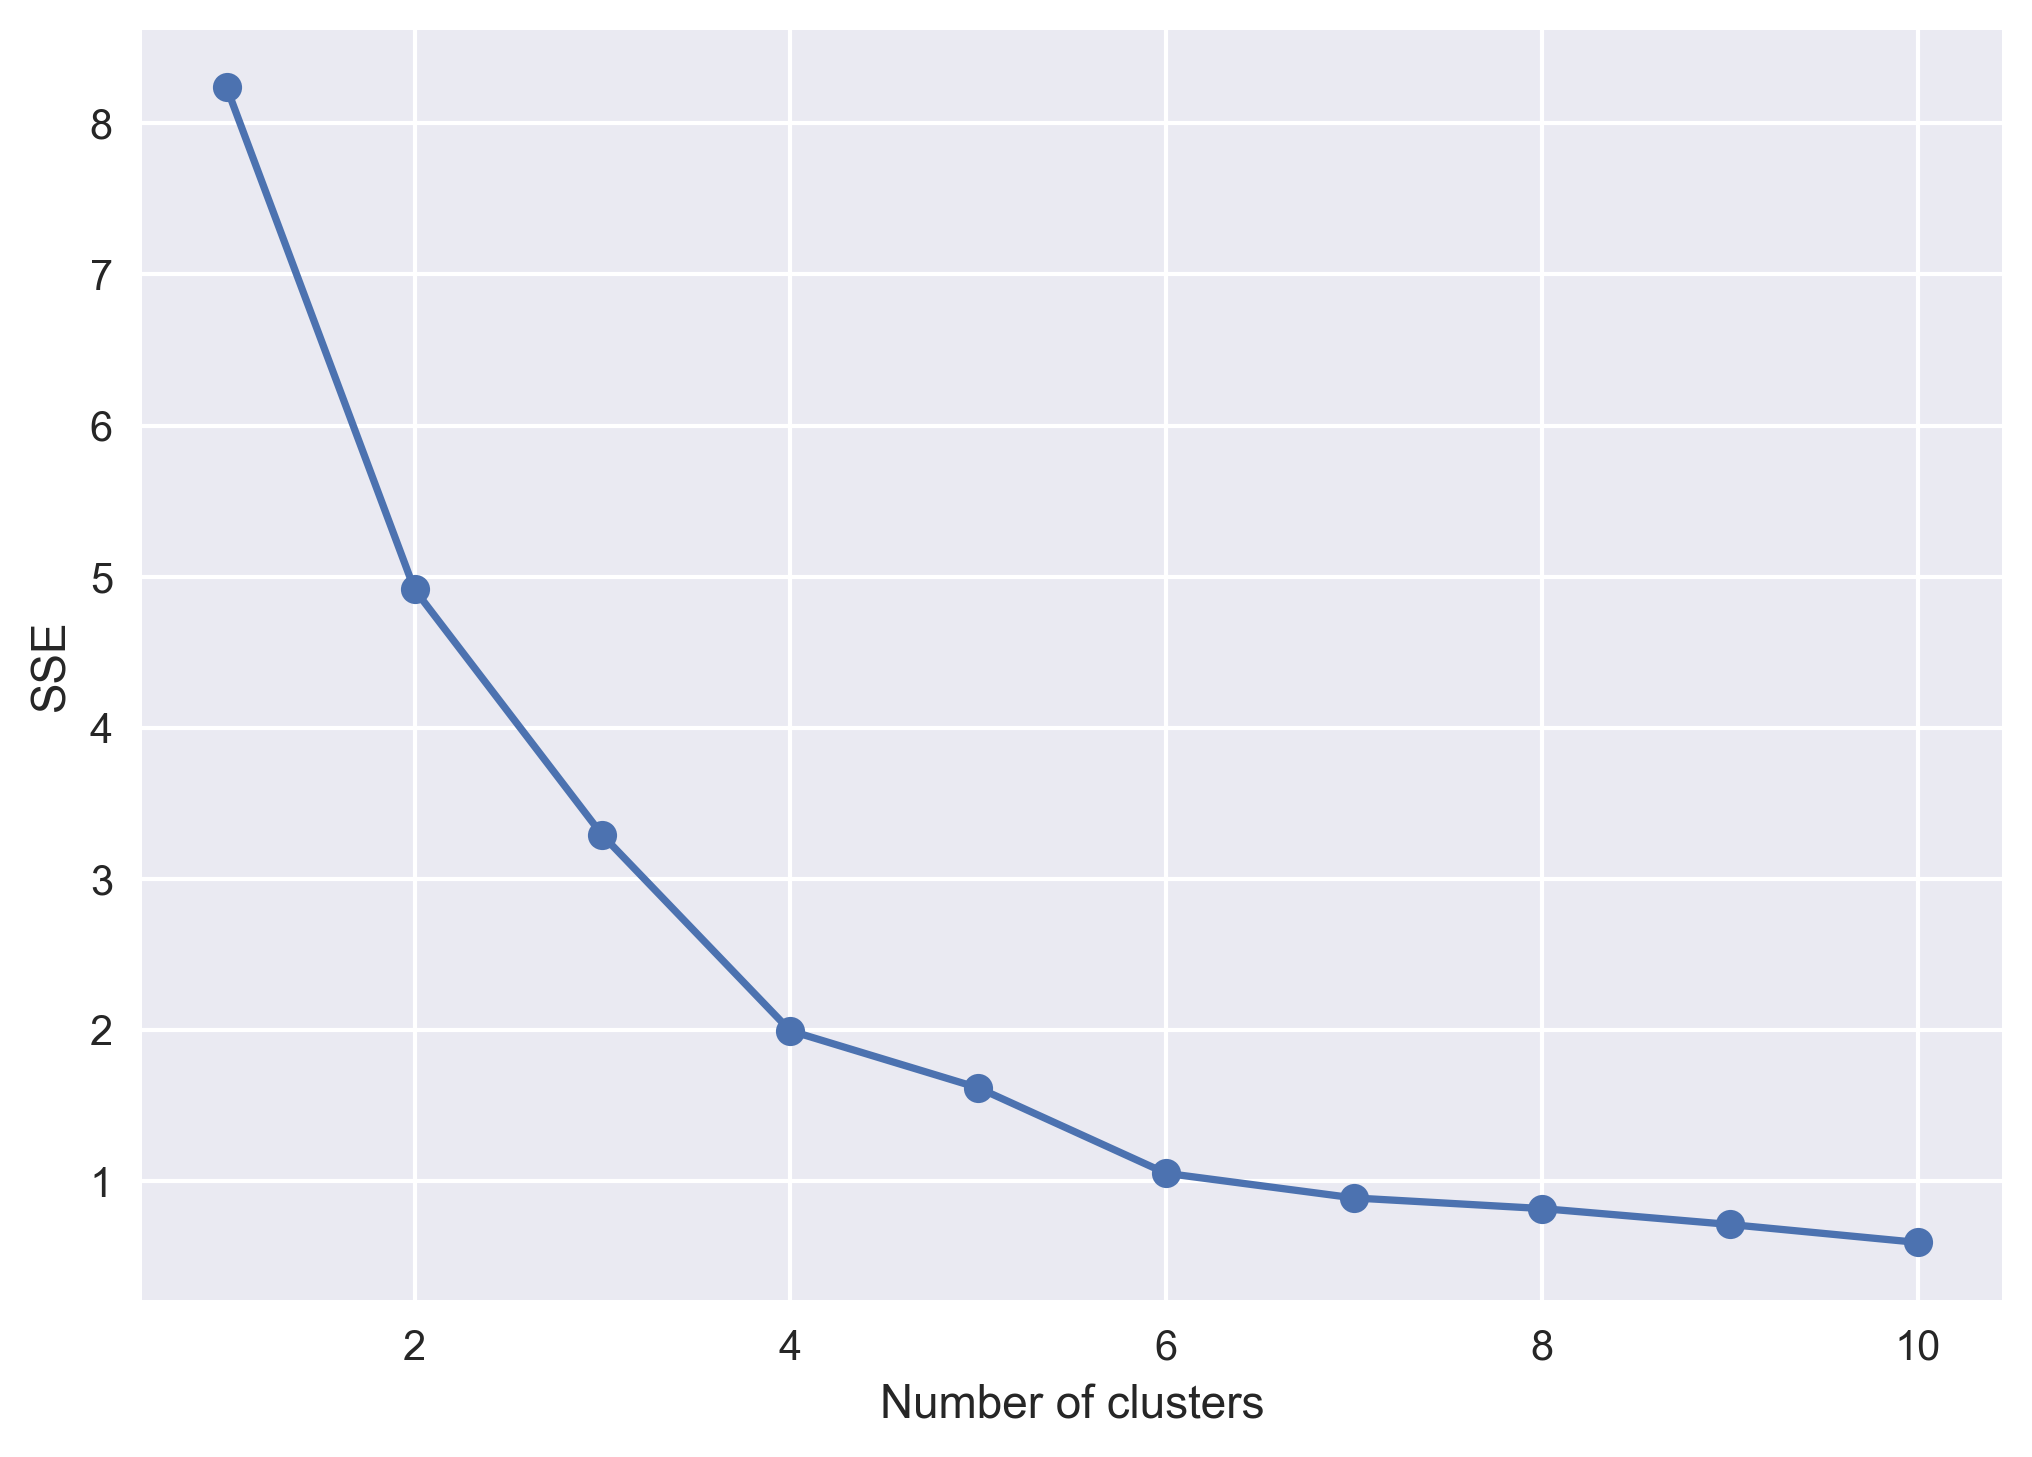

In [6]:
# 假设sse已经被定义，并且是一个包含10个元素的序列，
# 这些元素代表了从1到10个聚类中心的SSE值。
# 示例: sse = [100, 80, 65, 55, 45, 35, 30, 25, 20, 15]

# 创建一个新的figure，并设置分辨率为300dpi，这样可以使图像更清晰
fig, ax = plt.subplots(dpi=300)

# 使用ax对象的plot方法绘制从1到10个聚类中心的SSE变化曲线
# range(1, 11) 生成一个从1到10的整数序列，代表聚类的数量
# sse 是上述定义好的序列，包含了每个聚类数量下的SSE值
# marker='o' 表示在每个点上绘制一个圆形标记
ax.plot(range(1, 11), sse, marker='o')

# 设置x轴的标签文本为 'Number of clusters'
ax.set_xlabel('Number of clusters')

# 设置y轴的标签文本为 'SSE'
ax.set_ylabel('SSE')

# 显示图表
plt.show()

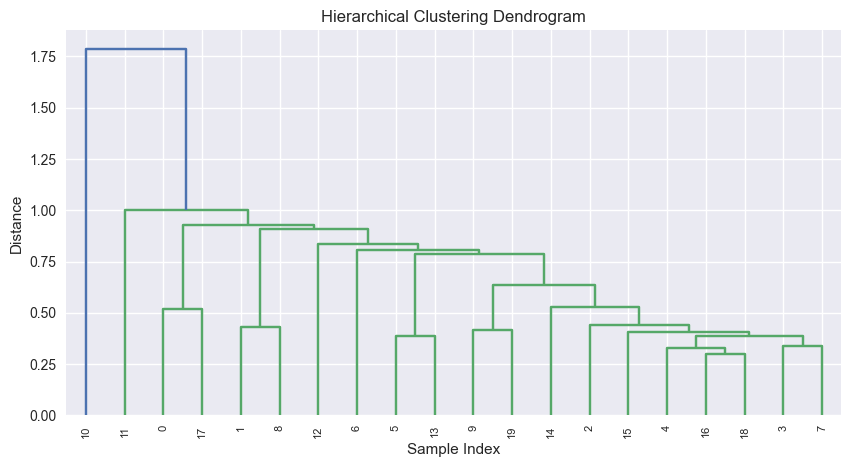

In [12]:
# 导入必要的库
import numpy as np  # numpy 是一个用于处理数组和执行数学运算的强大库
import matplotlib.pyplot as plt  # matplotlib 是一个用于创建高质量图表的库
from scipy.cluster.hierarchy import dendrogram, linkage  # 从 scipy 库导入用于执行层次聚类和绘制树状图的函数
from sklearn.cluster import AgglomerativeClustering  # 从 sklearn 库导入聚合聚类算法

# 生成示例数据集
np.random.seed(10)  # 设置随机数种子，确保每次运行生成相同的数据集
X = np.random.randn(20, 2)  # 生成一个20行2列的随机数据集

# 计算距离矩阵
Z = linkage(X, 'single')  # 使用单链接（'single'）方法计算所有样本对之间的距离矩阵

# 创建一个新的图形窗口
plt.figure(figsize=(10,5))  # 设置图形窗口的尺寸
plt.title('Hierarchical Clustering Dendrogram')  # 设置图形标题

# 设置图形的x轴和y轴标签
plt.xlabel('Sample Index')  # x轴标签为“样本索引”
plt.ylabel('Distance')  # y轴标签为“距离”

# 绘制树状图
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)  # 绘制树状图，leaf_rotation设置叶子旋转角度，leaf_font_size设置字体大小
plt.show()  # 显示图形

In [7]:
from sklearn.cluster import AgglomerativeClustering

# 生成数据
np.random.seed(0)
n_samples = 150
X = np.random.randn(n_samples, 2)

# 初始化聚类算法
agg_clustering = AgglomerativeClustering(n_clusters=3)

# 聚类并预测结果
y_pred = agg_clustering.fit_predict(X)

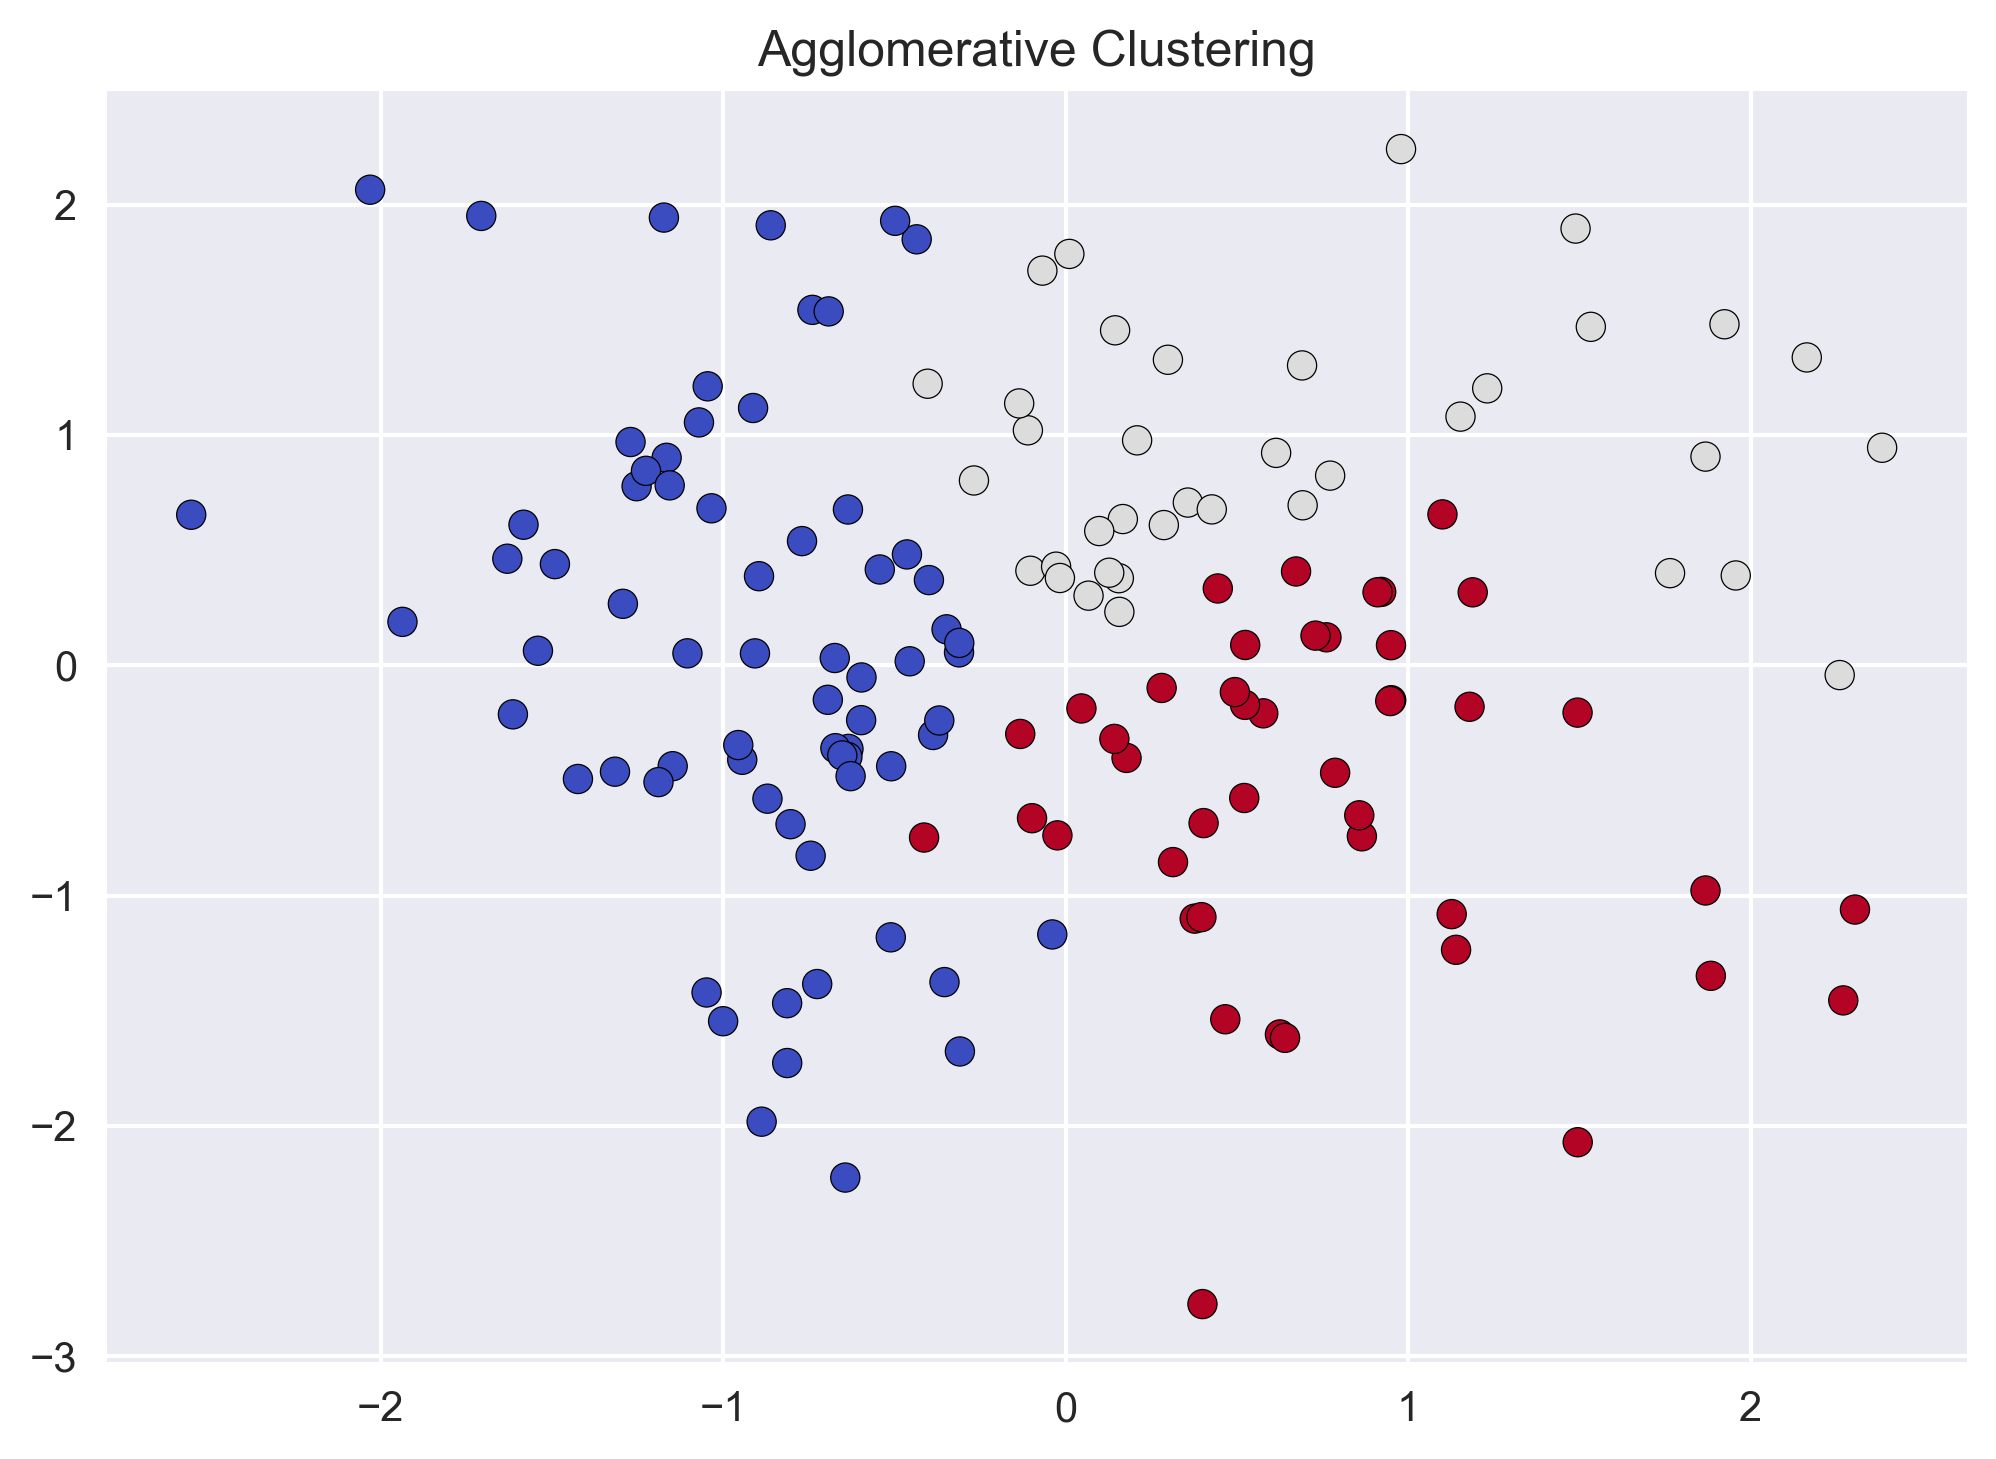

In [8]:
# 可视化聚类结果
plt.figure(dpi=300)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title('Agglomerative Clustering')
plt.show()

In [15]:
# 导入必要的库
import numpy as np  # NumPy 是一个用于处理大型多维数组和矩阵的库，并提供了大量的数学函数来操作这些数组
import matplotlib.pyplot as plt  # Matplotlib 是一个绘图库，能够生成各种静态、动态、交互式的图形
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage  # 从 scipy.cluster.hierarchy 模块导入用于层次聚类的功能

# 生成数据
np.random.seed(123)  # 设置随机种子，保证每次运行生成相同的数据集
X = np.random.randn(20, 2)  # 生成一个包含 20 行 2 列的正态分布随机数据矩阵

# 构建距离矩阵
Z = linkage(X, method='ward', metric='euclidean')  # 使用 Ward 方法和欧几里得距离度量构建层次聚类的距离矩阵

# 根据距离矩阵和指定阈值，将数据集划分为不同簇
max_dist = 1.5  # 定义一个最大距离阈值，用于决定聚类的切割点
clusters = fcluster(Z, max_dist, criterion='distance')  # 根据距离矩阵 Z 和阈值 max_dist，使用距离标准划分聚类

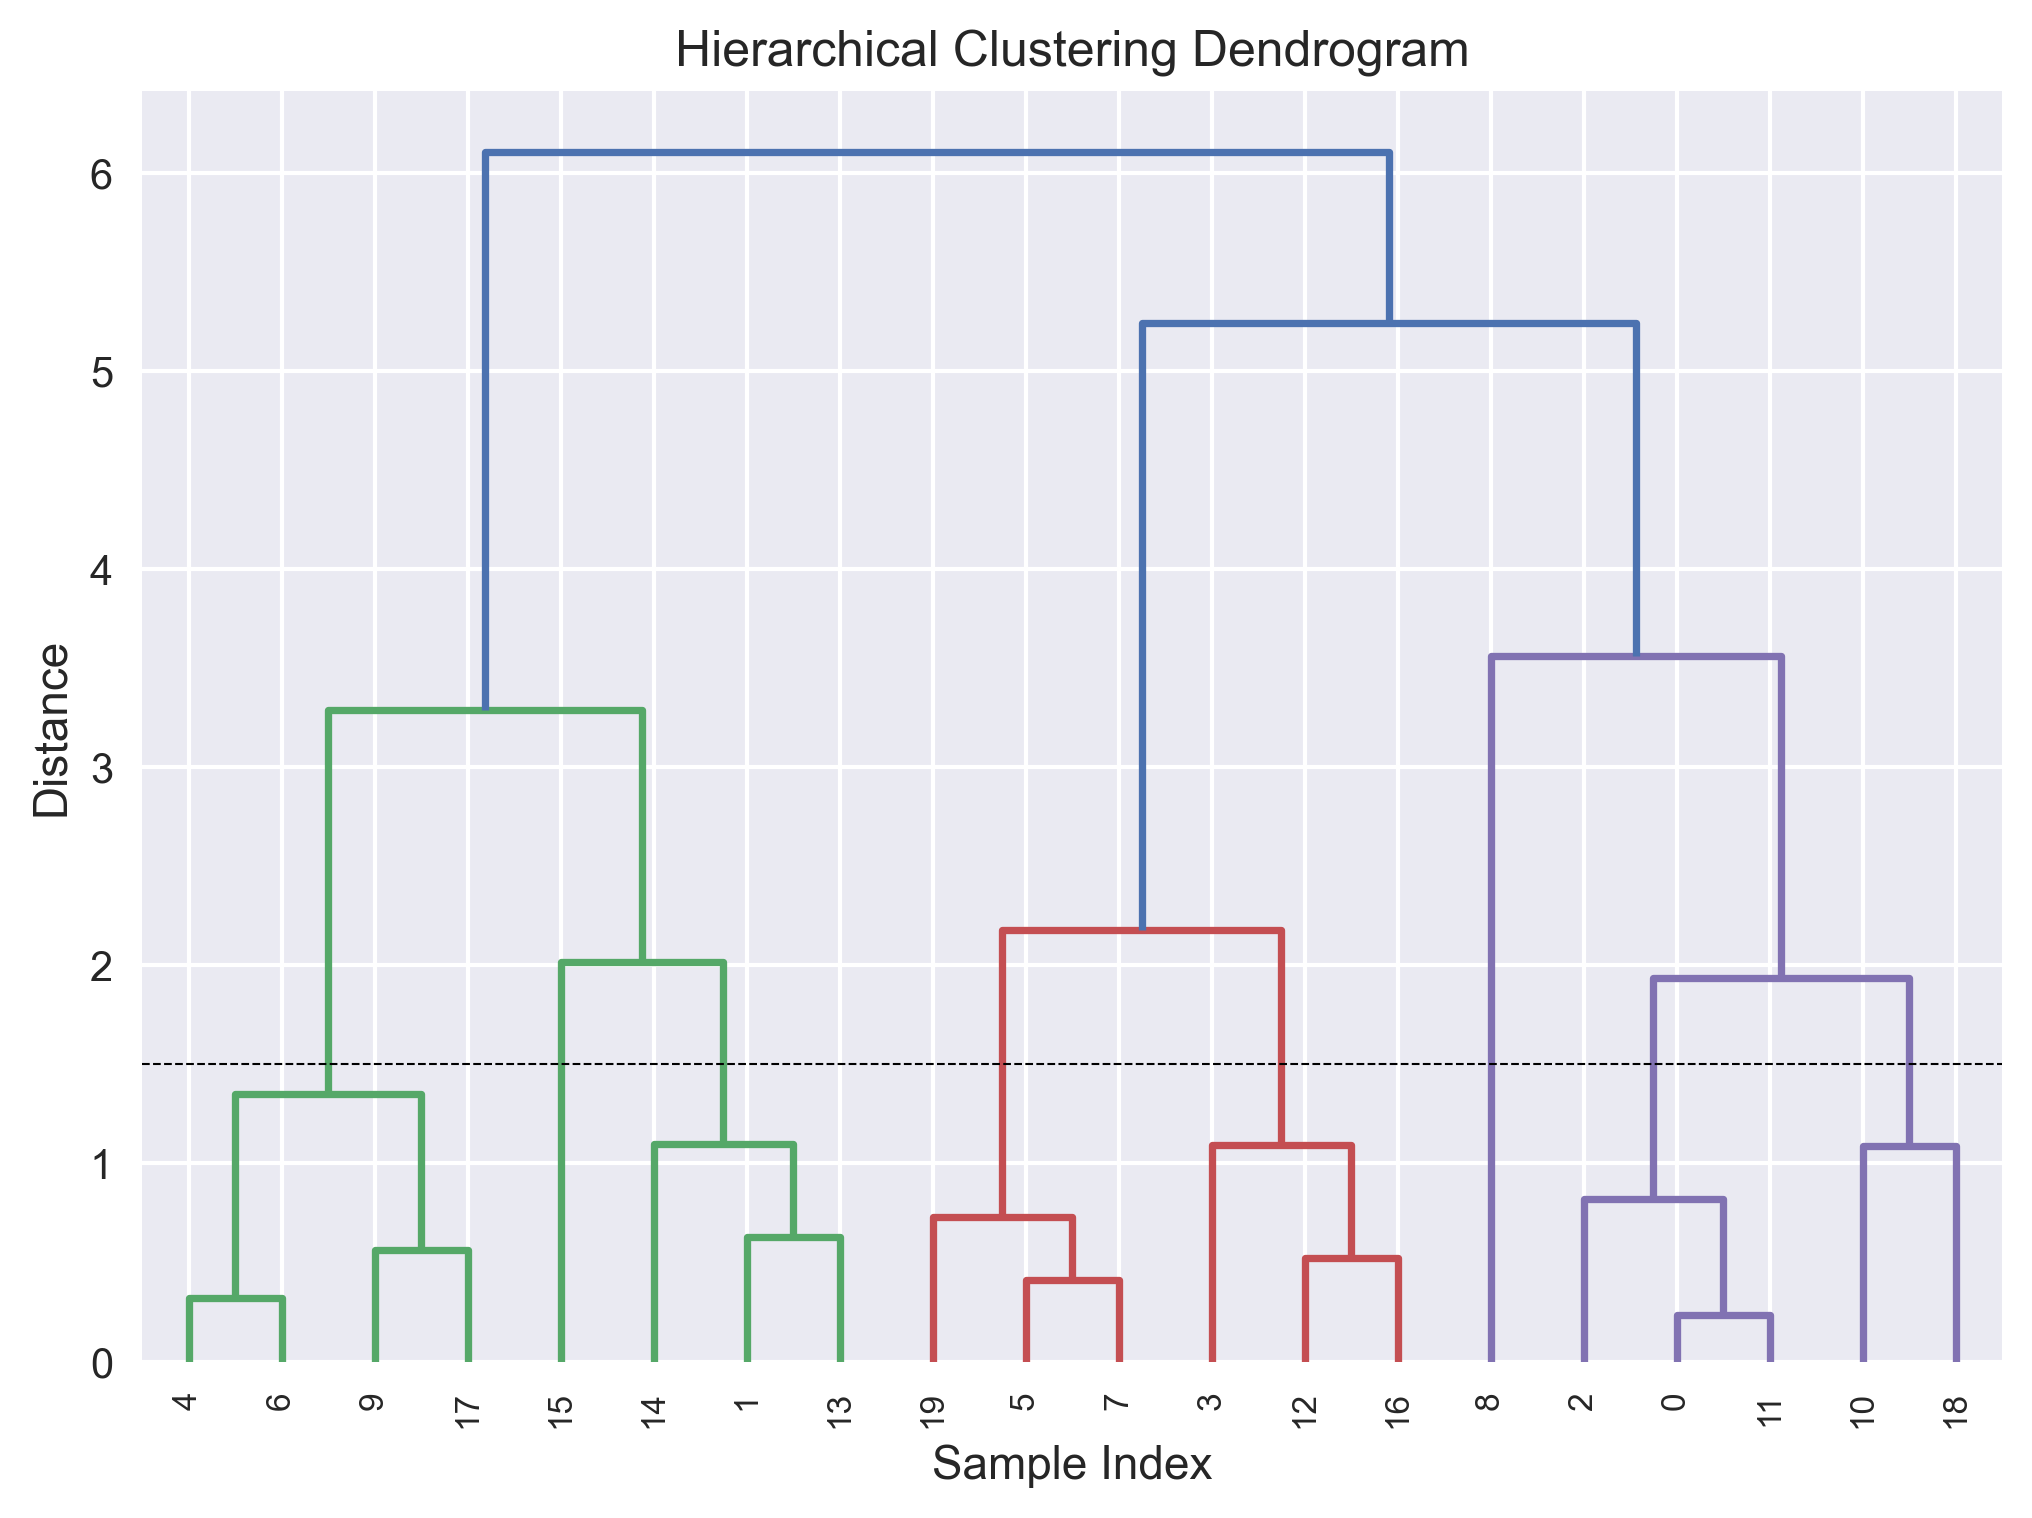

In [14]:
# 绘制树状图
plt.figure(dpi=300)  # 创建一个新的图形窗口，设置分辨率为300 dpi（每英寸点数）
plt.title('Hierarchical Clustering Dendrogram')  # 图形标题
plt.xlabel('Sample Index')  # x轴标签
plt.ylabel('Distance')  # y轴标签

# 使用dendrogram函数绘制树状图
# 参数leaf_rotation=90表示叶节点标签旋转90度
# 参数leaf_font_size=8表示叶节点标签字体大小为8
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)

# 在距离等于max_dist的位置画一条水平虚线
plt.axhline(y=max_dist, c='k', ls='--', lw=0.5)  # c='k' 表示黑色，ls='--' 表示虚线，lw=0.5 表示线宽为0.5
plt.show()  # 显示图形

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# 生成随机数据
np.random.seed(0)
X = np.random.randn(50, 2)

# 构建模型
model = AgglomerativeClustering(n_clusters=None, distance_threshold=2, linkage='ward')

# 拟合数据并预测聚类标签
model.fit(X)
labels = model.labels_

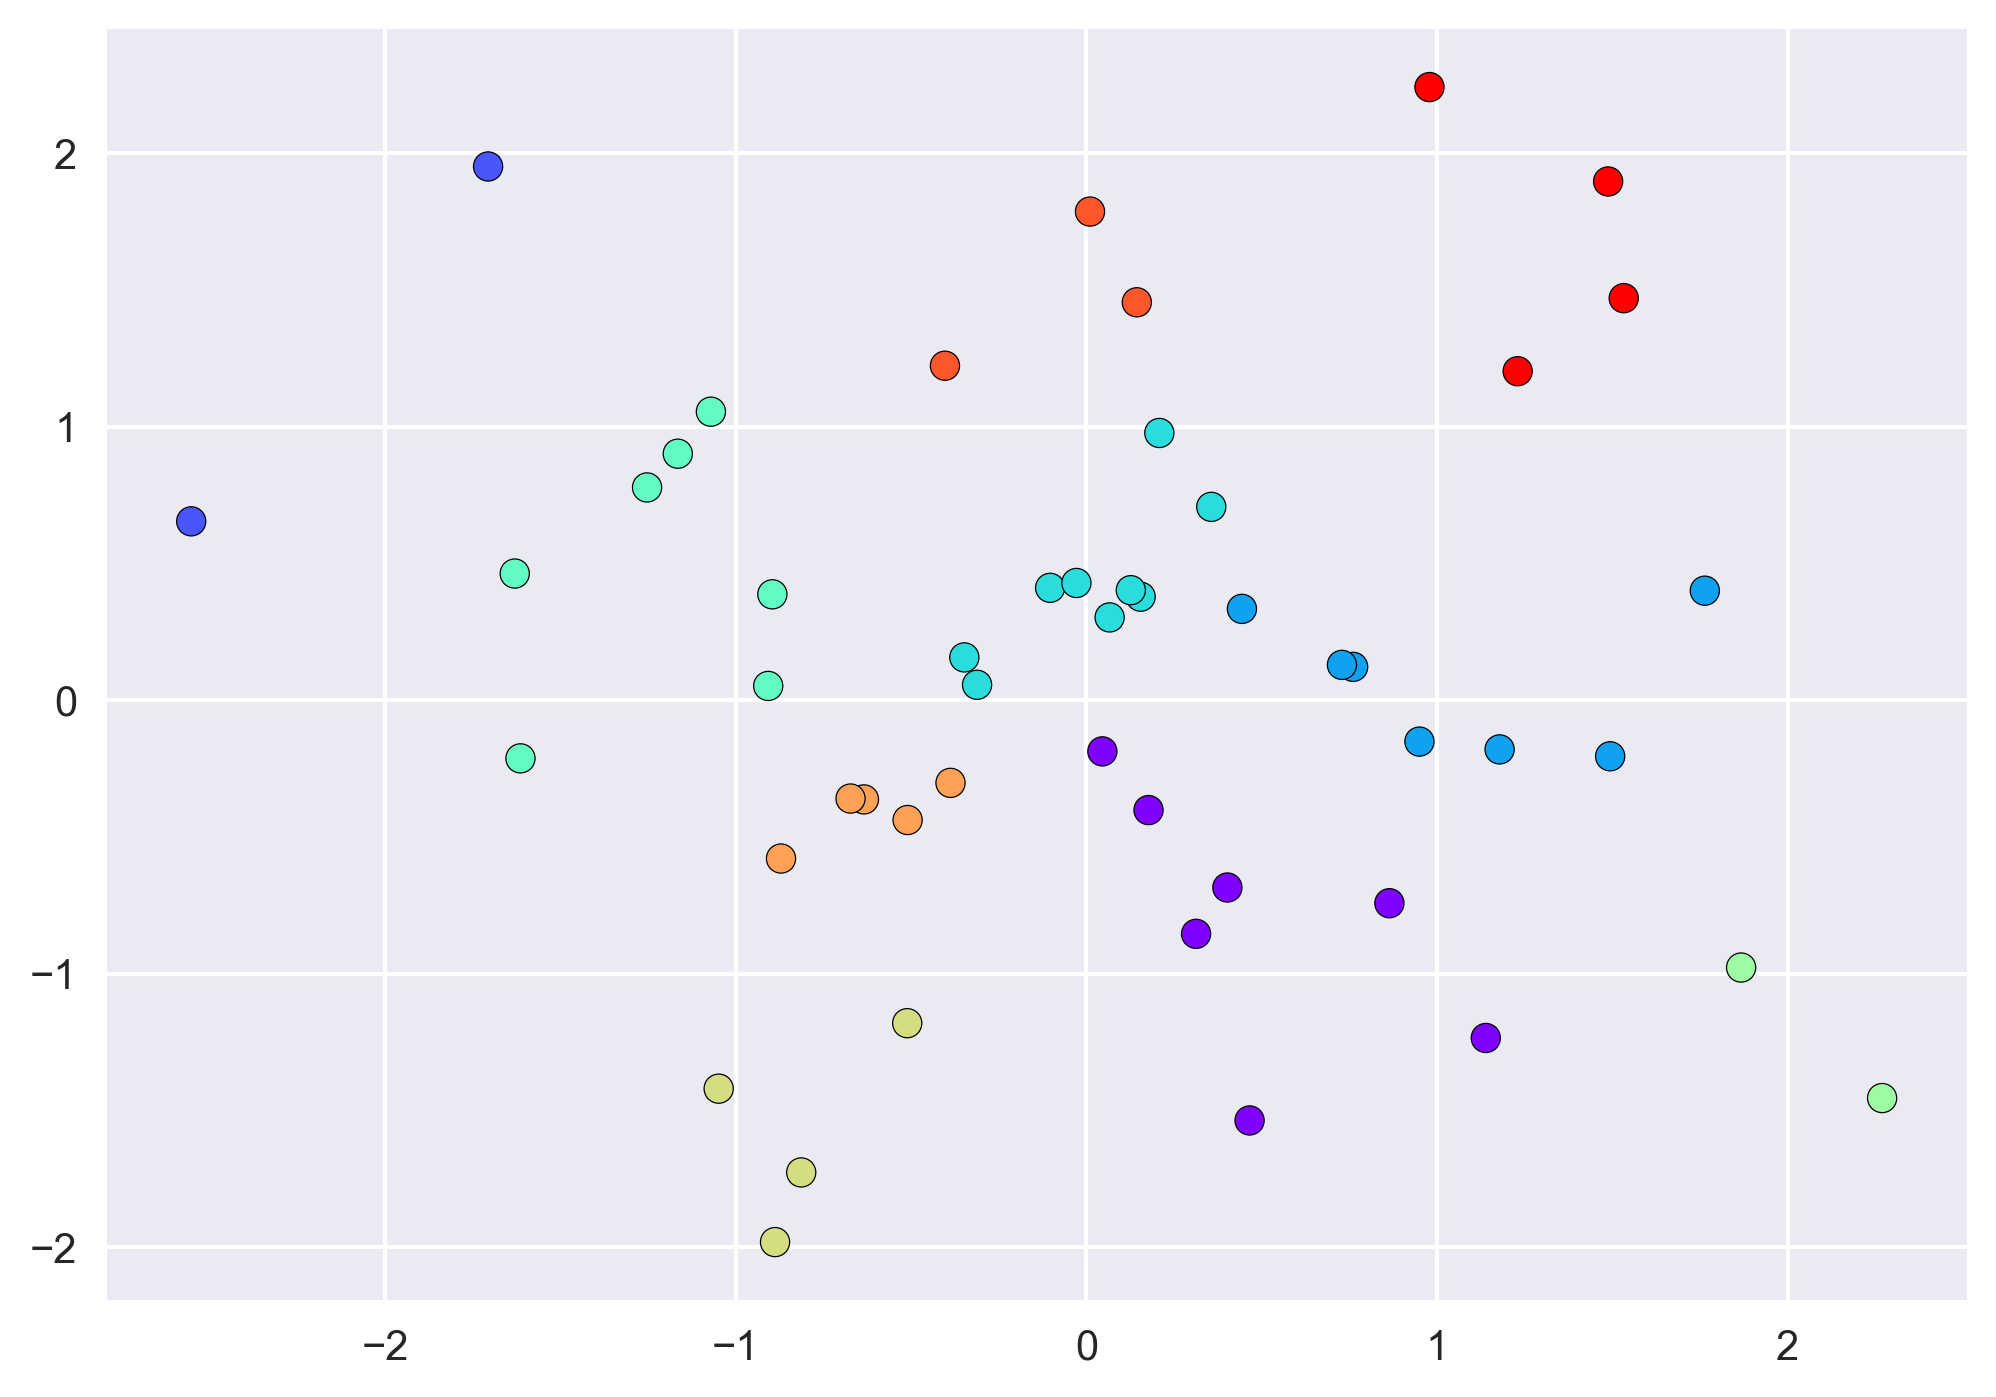

In [17]:
# 可视化结果
plt.figure(dpi=300)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow',edgecolor='k')
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# 生成样本数据
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# DBSCAN聚类
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

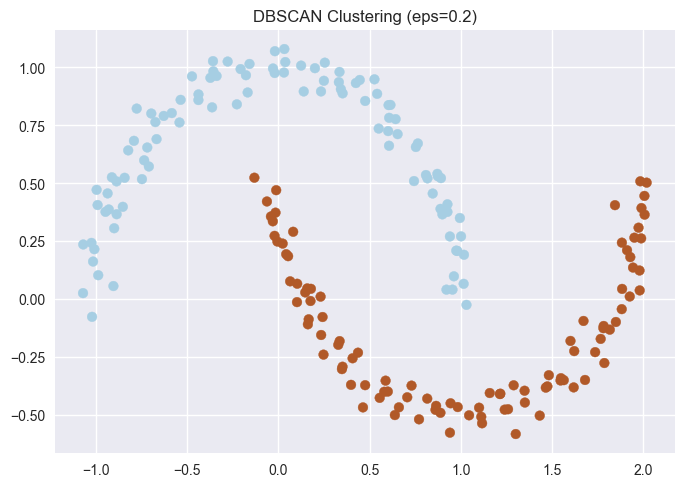

In [19]:
# 可视化结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired')
plt.title('DBSCAN Clustering (eps=0.2)')
plt.show()

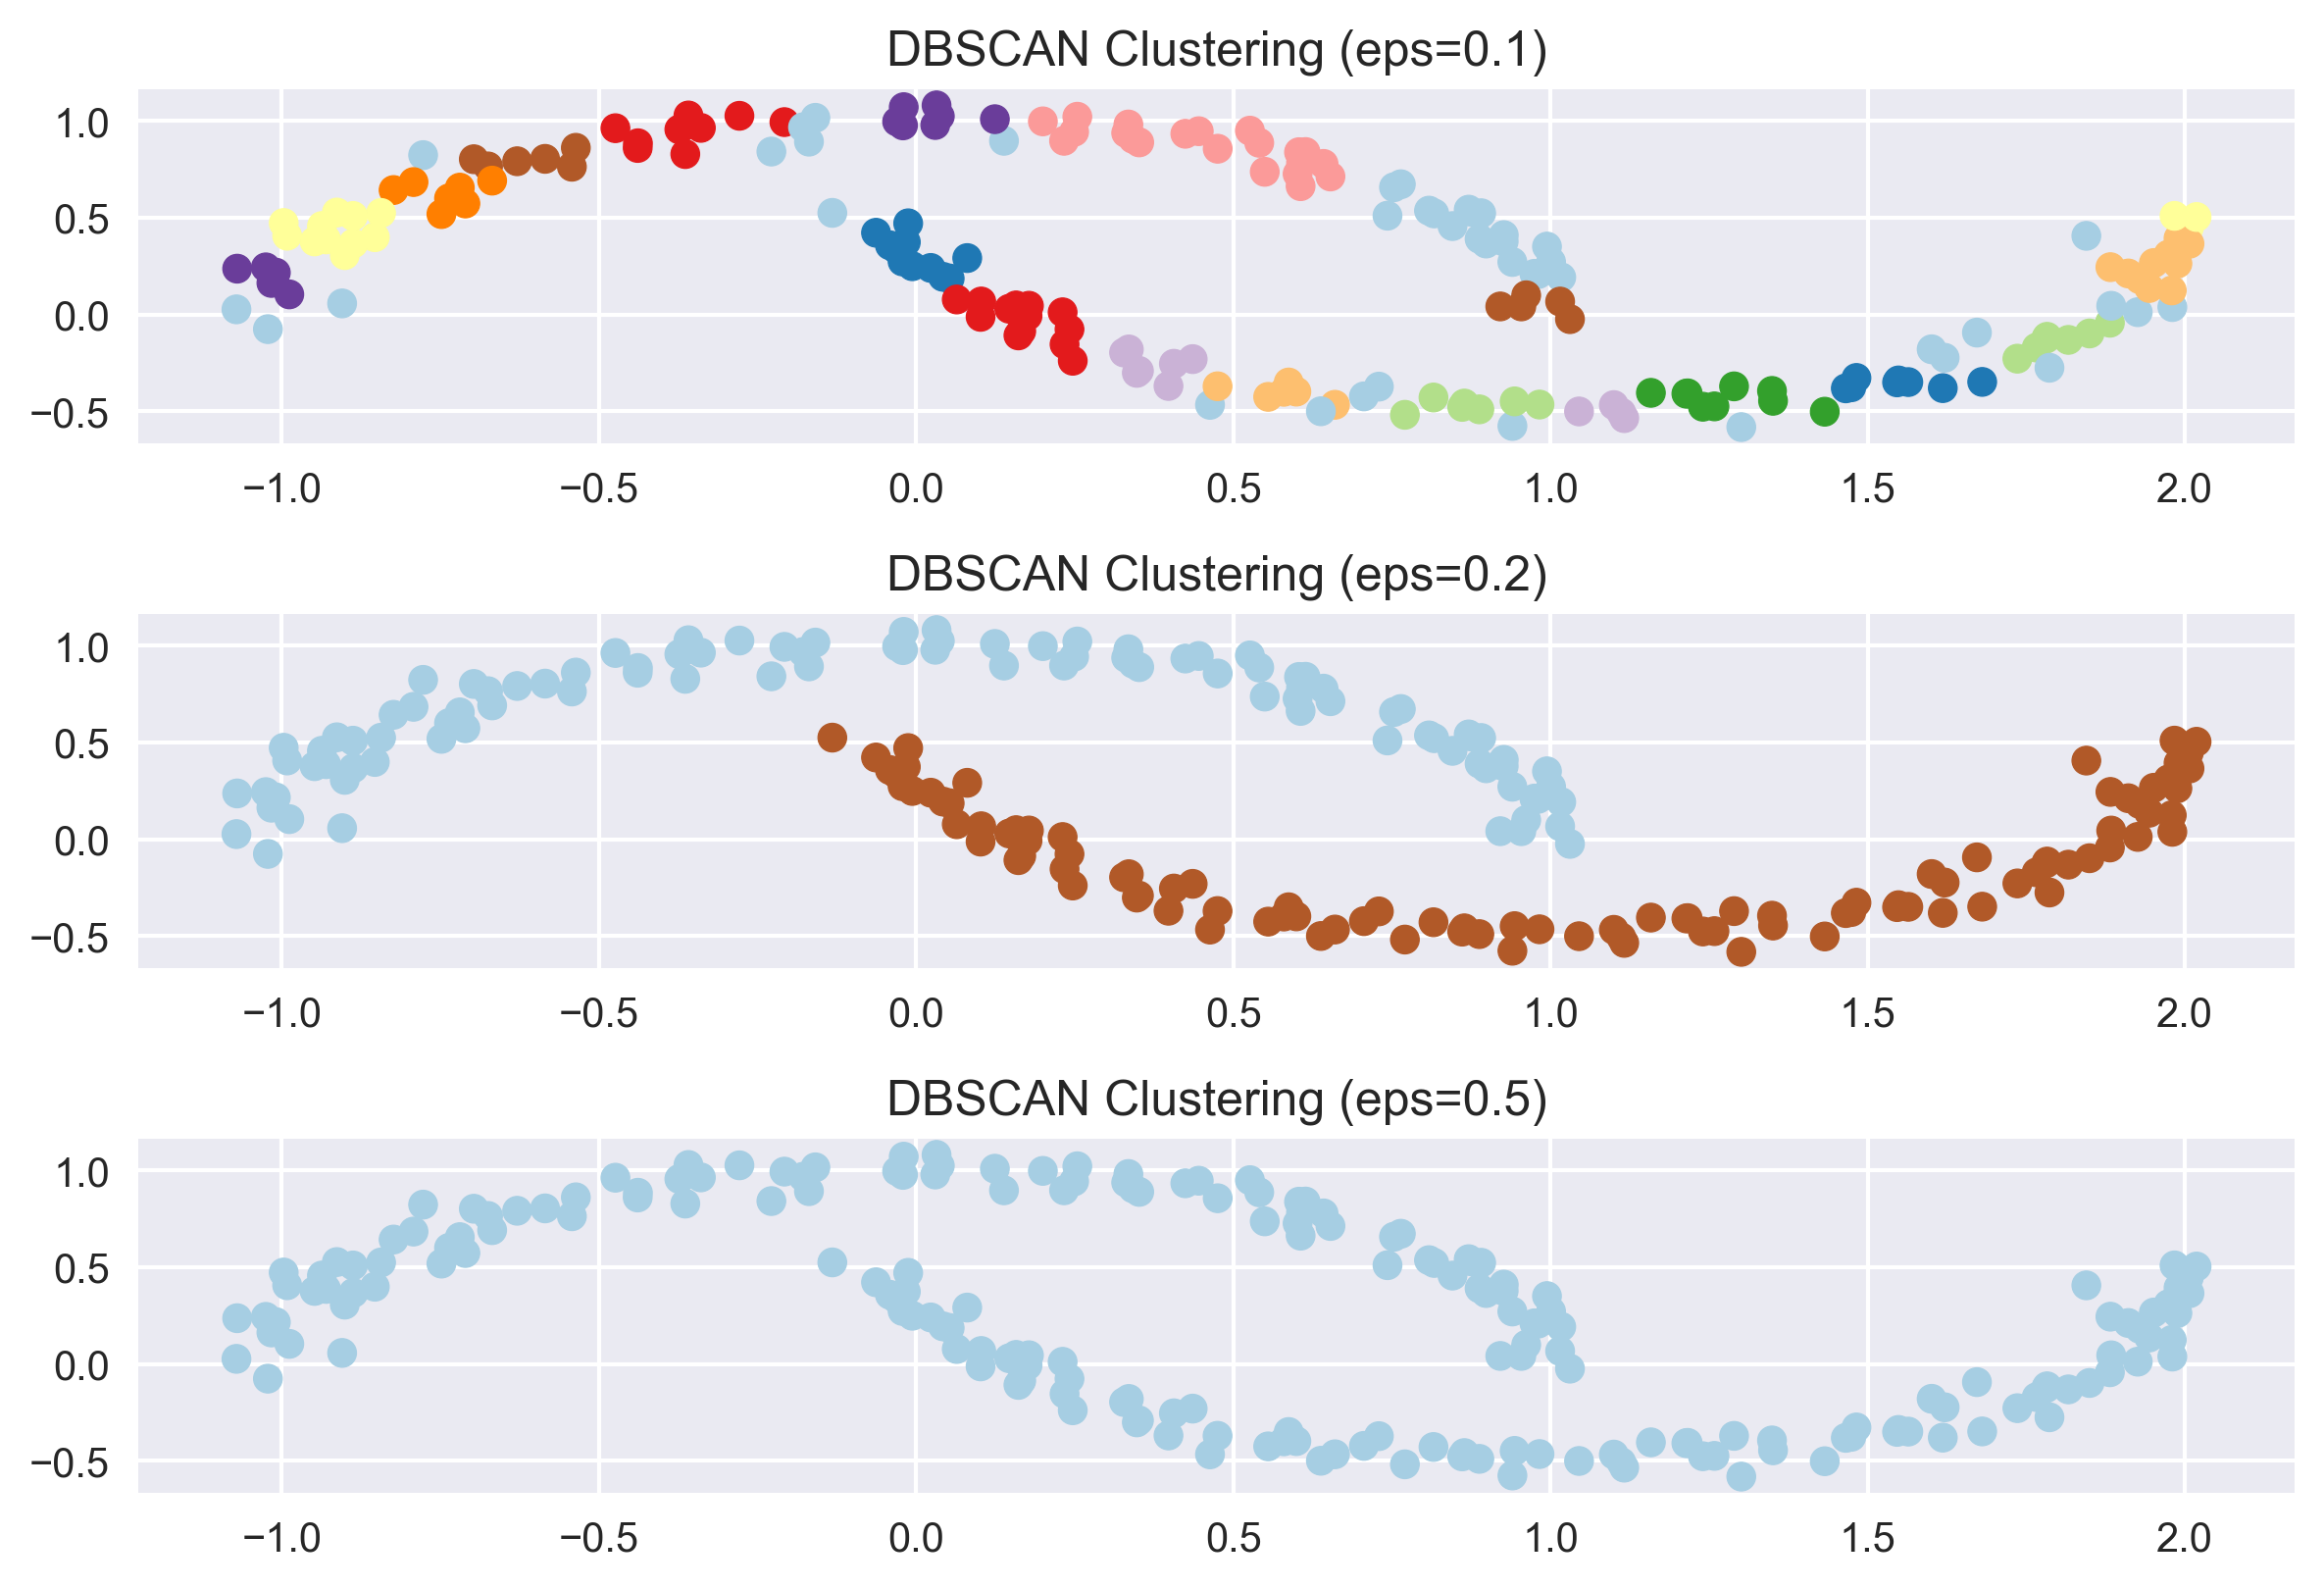

In [20]:
# 不同eps参数下的DBSCAN聚类
plt.figure(dpi=300)
'''
for eps in [0.1, 0.2, 0.5]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X)
    
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired')
    plt.title(f'DBSCAN Clustering (eps={eps})')
'''
dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(X)
plt.subplot(311)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired')
plt.title(f'DBSCAN Clustering (eps=0.1)')

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)
plt.subplot(312)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired')
plt.title(f'DBSCAN Clustering (eps=0.2)')

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)
plt.subplot(313)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired')
plt.title(f'DBSCAN Clustering (eps=0.5)')

plt.tight_layout()
plt.savefig('figs/9-7.png', dpi=300)
plt.show()